In [ ]:
import torch
import torch.nn as nn
import math
from datetime import datetime
import time
import torchvision.transforms as transforms
import my_transform
import torchvision.models as models
from torch.utils.tensorboard import SummaryWriter
import net
import numpy as np
from scipy import signal
import librosa
import os
import matplotlib.pyplot as plt
import random
import test
import pandas as pd
from torch.utils.data import Subset

import data_utils
import bird_dataset

In [ ]:
filepath = '/Users/q/Develop/Dataset/CLEF_2021_2023/train_audio/abethr1/XC128013.ogg'
mel = data_utils.get_mel_from_audio(filepath, 512, False, False, 80)
data_utils.show_spectrogram(mel, '预加重前频谱图')
mel = data_utils.get_mel_from_audio(filepath, 512, True, False, 80)
data_utils.show_spectrogram(mel, '预加重后频谱图')

In [ ]:
s_tensor = mel
s_db = s_tensor.view(s_tensor.shape[1], s_tensor.shape[2]).numpy()
plt.figure(figsize=(10, 2))
librosa.display.specshow(s_db, sr=32000, x_axis='time', y_axis='linear')
plt.xlabel('时间')
plt.ylabel('频率（Hz）')
plt.savefig('temp.png', dpi=500, bbox_inches='tight') # 解决图片不清晰，不完整的问题
plt.show()

### 静音切除

In [ ]:
# Load audio file
filepath = '/Users/q/Develop/Dataset/CLEF_2021_2023/train_audio/abethr1/XC128013.ogg'
y, sr = librosa.load(filepath)
data_utils.show_waveform(y, title='静音切除前波形图')
y_new = data_utils.remove_silence(y,27)
width_alpha = len(y_new)/len(y)
data_utils.show_waveform(y_new, title='静音切除后波形图',width_alpha=width_alpha)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import librosa

# 生成C4和C5音的信号并相加
sr = 32000
duration = 0.01
# freq_c4 = librosa.note_to_hz('A4')
# freq_c5 = librosa.note_to_hz('B4')

freqs = [300, 500, 900]
am = [6, 9, 5]
t = np.linspace(0, duration, int(sr*duration), endpoint=False)
x = 0
for index, freq in enumerate(freqs):
    x += am[index] * np.sin(2*np.pi*freq*t)

# 绘制波形图
plt.figure(figsize=(12, 3))
plt.plot(t, x, color='brown')
plt.xlabel('时间 (s)')
plt.ylabel('振幅')
plt.title(f'原始信号（{freqs[0]}Hz、{freqs[1]}Hz、{freqs[2]}Hz 叠加）')
plt.savefig('1.png', dpi=500, bbox_inches='tight') # 解决图片不清晰，不完整的问题
plt.show()

colors = ['green', 'orange', 'red']
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 3))
for i, freq in enumerate(freqs):
    t = np.linspace(0, duration, int(sr*duration), endpoint=False)
    x = am[i] * np.sin(2*np.pi*freq*t)
    axs[i].set_ylim([-10, 10])
    axs[i].plot(t, x, color=colors[i])
    axs[i].set_xlabel('时间 (s)')
    axs[i].set_ylabel('振幅')
    axs[i].set_title('{}Hz 波形图'.format(freq))
plt.subplots_adjust(wspace=0.3)
plt.savefig('2.png', dpi=500, bbox_inches='tight') # 解决图片不清晰，不完整的问题
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import librosa

filepath = '/Users/q/Develop/Dataset/CLEF_2021_2023/train_audio/abethr1/XC128013.ogg'
y, sr = librosa.load(filepath)
y = y[30100:30500]
t = librosa.frames_to_time(range(len(y)), sr=sr)
y1 = y[300000:310001]
y2 = y[310000:320001]
y3 = y[320000:330000]
t1 = librosa.frames_to_time(range(10001), sr=sr)
t2 = librosa.frames_to_time(range(10000, 20001), sr=sr)
t3 = librosa.frames_to_time(range(20000, 30000), sr=sr)

# 绘制波形图
plt.figure(figsize=(12, 3))
plt.plot(t, y)
# plt.plot(t1, y1)
# plt.plot(t2, y2)
# plt.plot(t3, y3)
# plt.xlabel('时间')
plt.ylabel('振幅')
# plt.title(f'原始信号')
plt.savefig('3.png', dpi=500, bbox_inches='tight') # 解决图片不清晰，不完整的问题
plt.show()

### 混合

In [ ]:
# 随机混合
filepath1 = '/Users/q/Develop/Dataset/CLEF_2021_2023/train_audio/abethr1/XC128013.ogg'
filepath2 = '/Users/q/Develop/Dataset/CLEF_2021_2023/train_audio/varsun2/XC205511.ogg'
mel1 = data_utils.get_mel_from_audio(filepath1, 512, False, False, 80)
mel2 = data_utils.get_mel_from_audio(filepath2, 512, False, False, 80)

transform = transforms.Compose([
    my_transform.RandomHorizontalCrop(512),
])
mel1 = transform(mel1)
mel2 = transform(mel2)

In [ ]:
for s_tensor in [mel1, mel2]:
    s_db = s_tensor.view(s_tensor.shape[1], s_tensor.shape[2]).numpy()
    plt.figure(figsize=(4, 4))
    librosa.display.specshow(s_db, sr=32000, x_axis='time', y_axis='linear')
    plt.savefig(f'{random.random()}.png', dpi=500, bbox_inches='tight') # 解决图片不清晰，不完整的问题
    plt.show()

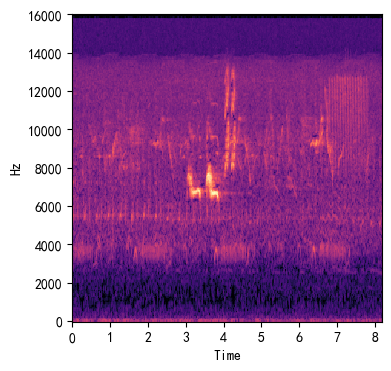

In [46]:
s_tensor = mel1 * (1-0.3) + mel2 * 0.3
s_db = s_tensor.view(s_tensor.shape[1], s_tensor.shape[2]).numpy()
plt.figure(figsize=(4, 4))
librosa.display.specshow(s_db, sr=32000, x_axis='time', y_axis='linear')
plt.savefig(f'{random.random()}.png', dpi=500, bbox_inches='tight') # 解决图片不清晰，不完整的问题
plt.show()

### Tanh

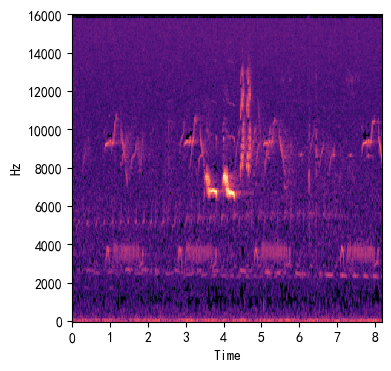

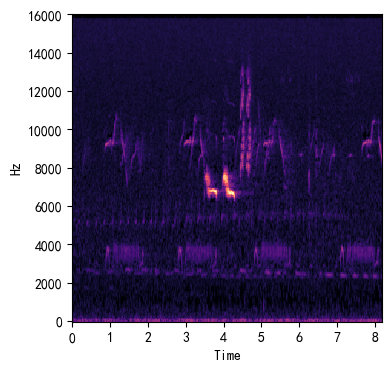

In [50]:
filepath = '/Users/q/Develop/Dataset/CLEF_2021_2023/train_audio/abethr1/XC128013.ogg'
mel = data_utils.get_mel_from_audio(filepath, 512, False, False, 80)
transform = transforms.Compose([
    my_transform.RandomHorizontalCrop(512),
])
mel = transform(mel)
s_tensor = mel
s_db = s_tensor.view(s_tensor.shape[1], s_tensor.shape[2]).numpy()
plt.figure(figsize=(4, 4))
librosa.display.specshow(s_db, sr=32000, x_axis='time', y_axis='linear')
plt.savefig(f'{random.random()}.png', dpi=500, bbox_inches='tight') # 解决图片不清晰，不完整的问题
plt.show()
transform = transforms.Compose([
    my_transform.TanhDistortion(0.02, True)
])
mel = transform(mel)
s_tensor = mel
s_db = s_tensor.view(s_tensor.shape[1], s_tensor.shape[2]).numpy()
plt.figure(figsize=(4, 4))
librosa.display.specshow(s_db, sr=32000, x_axis='time', y_axis='linear')
plt.savefig(f'{random.random()}.png', dpi=500, bbox_inches='tight') # 解决图片不清晰，不完整的问题
plt.show()

# 评估的图在主文件里面！！！